## Виды данных в эконометрике

* Пространственные данные (cross section data). Пространственными называются данные, собранные о множестве объектов за один момент времени. Например, данные о ценах однокомнатных квартир в Москве в мае 2020 года. Или данные о росте и весе тысячи индивидов по состоянию на 1 сентября 2020 года.
* Временные ряды (time series). Под временным рядом понимаются данные об одном объекте, собранные в течение нескольких последовательных тактов времени. Например, ежедневные данные о курсе доллара, собранные за год. Или данные о росте и весе Ивана Петровича Сидорова, которые собирались 1 числа каждого месяца на протяжении пяти лет.
* Панельные данные (panel data). Панельными называются данные о нескольких объектах, измеренные в течение нескольких тактов времени. Например, ежегодные данные об уровне инфляции в 50 развивающихся странах, собранные за 10 лет. Или данные о росте и весе тысячи индивидов, по каждому из которых доступна информация за 12 месяцев.

# Временные ряды

Временной ряд — значения меняющихся во времени признаков, полученные в некоторые моменты времени.

## Прогнозирование с помощью сведения к задаче регрессии

Посмотрим на этот график, на котором показаны продажи одного их товаров в магазине за разные года.

![](https://yastatic.net/s3/ml-handbook/admin/ts_predict_df49cf88a0.png)

Мы знаем значения ряда (**зеленые**) до момента времени, в данном случае за 4 года с 2013 по 2016 включительно. Предположим также, что в данный момент мы отмечаем Новый год 2017. В этот момент мы хотели бы предсказать (**синее**) будущие значения ряда (**оранжевое**) за весь 2017 год на основе четырехлетней истории продаж.

Основная идея – подадим известные (зеленые) значения ряда в какую-то регрессионную функцию, получив тем самым предсказания. При этом можем брать не все известные значения ряда, а только $p$ последних значений. Иначе говоря, модель имеет вид

$$y(t) = f(y(t-1),......,y(t-p)$$

где $f$ – произвольная функция. Ее можно построить некоторым известным методом машинного обучения, например, линейной регрессией, решающими деревьями, бустингами, нейронными сетями (как сверточными, так и рекуррентными). Разберёмся, какие признаки мы подадим на вход регрессии.





## Признаки

### Общий принцип

На практике при генерации идей о том, какие признаки можно создавать для построения модели, рекомендуется строить следующий график. На нем нужно отметить момент времени $t$ и мысленно поставить себя в этот момент времени. Затем нужно подумать, какие данные нам при этом доступны. В модель можно брать любые признаки, которые доступны к моменту времени $t$.

![](https://yastatic.net/s3/ml-handbook/admin/1_rgb_split_rooster_902d9298d4.svg)

### Даты

Посмотрим на то, какие признаки можно извлечь

Пусть дана какая-то дата: __13.04.2021 09:00__.

Отсюда можно получить следующие признаки:

день недели: [2];
месяц: [4];
год: [2021];
сезон: [весна];
праздник: [0];
выходной: [0];
час: [9].

### Предыдущие значения ряда

Например, если мы хотим построить признаки в момент времени $t$ для прогнозирования, $y(t)$ то можно рассмотреть в качестве признаков $p$ предыдущих значений ряда $y(t-1),...,y(t-p)$.

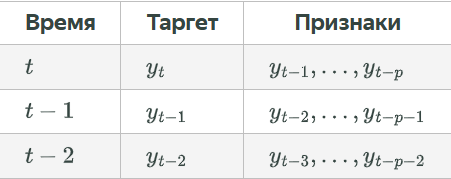

Для реализации таких признаков можно выполнить сдвиги вперед временного ряда на $1, 2,...., p$ шагов. Например, в таблице для прогнозирования значений ряда мы рассматриваем два предыдущих значения ряда, выполняя тем самым два сдвига назад.

![](https://yastatic.net/s3/ml-handbook/admin/1_rgb_split_rooster_copy_127d9b7e45.svg)

### Скользящее окно

Не всегда имеет смысл в качестве признаков в чистом виде брать все предыдущие значения ряда. Например, если данные приходят раз в секунду, то для того чтобы учесть изменения ряда за последний час, пришлось бы создавать 3600 признаков. Вместо этого по предыдущим значениям ряда $y(t-1),.......,y(t-p)$ можно посчитать:
* среднее;
* взвешенное среднее;
* экспоненциальное сглаживание;
* медиану;
* минимум/максимум;
* стандартное отклонение;
* любую другую статистику

Подобное скользящее окно можно рассматривать и по другим временным факторам, которые мы не прогнозируем.

Если в задаче данные хорошие и удаётся использовать более-менее стандартные признаки, то можно воспользоваться готовыми инструментами. Если данные не очень приятные, стоит подумать над тем, какие признаки использовать и как реализовать их получение.

### Сезонность

Если во временном ряду наблюдается сезонность, то стоит использовать сезонные признаки, например, следующие.

Значение переменной сутки/неделю/месяц/год назад. Такие факторы также можно усреднять.
Сезонность, полученная методами декомпозирования ряда (об этом расскажем ниже).

Примеры:
* Значение температуры год назад.
* Среднее значение температуры 23 ноября за 5 последних лет.
* Среднее значение температуры за 5 последних лет на неделе, в которую входит 23 ноября.

### Счётчики

Можно также использовать сразу несколько факторов. Например, мы строим прогноз в апреле. Тогда можно рассматривать среднюю температуру в безветренные дни в апреле по историческим данным.

### Резюме

Подведем итог о том, какие признаки можем использовать для построения нашей модели.

* Используются только данные из прошлого, никакие данные из будущего нельзя использовать при прогнозировании. Нужно также учитывать возможные задержки в поступлении данных.
* Большое количество признаков может привести к вычислительным затратам.
* Можно генерировать и другие признаки с учетом знаний о предметной области.

## Построение прогноза

Мы определились с тем, какие брать признаки. Теперь разберемся с тем, как прогнозировать. Пусть требуется построить прогноз на $H$ шагов вперед. Выделяют три основных способа построить прогнозы:

1. Рекурсивная стратегия;
2. Прямая стратегия;
3. Гибридная стратегия.

### Рекурсивная стратегия

Для каждого момента времени $t_{0} <= t <= T$ создается объект обучающей выборки:

* Признаковое описание – история ряда до момента времени $t-1$
* Целевая метка – значение $y_{t}$

По этим данным мы обучаем какую-либо регрессионную модель строить прогнозы на один шаг вперед. При построении прогноза на несколько шагов вперед мы сначала построим прогноз на один шаг. Затем – на второй шаг, используя полученный прогноз на первый шаг в качестве признаков, и далее аналогично.

Иначе говоря, если для прогнозирования $y_{t}$ признаковое описание имеет вид $(y_{t-p},..., y_{t-1})$, то для построения прогноза $y_{t+1}$ рассматривается признаковое описание $(y_{t-p+1},...,y_{t-1}, \hat{y})$

![](https://yastatic.net/s3/ml-handbook/admin/recursive_8427cc778b.png)

### Прямая стратегия

В прямой стратегии предполагается, что построением каждого прогноза в рамках горизонта прогнозирования должна заниматься своя модель. Тем самым создается $H$ моделей прогнозирования для каждого момента времени $t_{0} \leq t \leq t_{0} + H - 1$.

* Признаковое описание – история ряда до момента времени $t_{0}-1$, причем признаки одни и те же для каждой модели.
* Целевая метка – значение $y_{t}$

![](https://yastatic.net/s3/ml-handbook/admin/direct_7ff22dabcb.png)

### Гибридная стратегия

Гибридная стратегия объединяет в себе преимущества рекурсивной и прямой стратегий
Как и в прямой стратегии, создается $H$ моделей прогнозирования, но при этом каждая следующая модель использует прогнозы предыдущей подобно тому, как это делает рекурсивная стратегия.

Итак, мы должны построить

* модель для прогноза на 1 шаг вперед;
* модель для прогноза на 2 шага вперед, используя прогноз уже обученной модели на 1 шаг вперед в качестве признака;
* модель для прогноза на 3 шага вперед, используя прогноз уже обученных моделей на 1 и 2 шага вперед в качестве признаков;
* и так далее обучается $H$ моделей.

Признаковое описание:

* история ряда до момента времени $t_{0}-1$
* предсказание предыдущих моделей для $t_{0}, t_{0}-1,......,t-1$

![](https://yastatic.net/s3/ml-handbook/admin/hybrid_8f9dd2444d.png)

Можно задаться вопросом: что лучше брать при обучении моделей для прогноза на несколько шагов вперёд – истинные значения или же предсказания предыдущих моделей. Если брать истинные, то мы можем точнее построить модели прогнозирования, но, с другой стороны, на этапе применения вы будете использовать прогнозы, а они могут иметь другое распределение, чем истинные данные, в частности, могут иметь смещение и большую дисперсию. В таком случае мы получим плохие следующие прогнозы.

## Модели для нескольких временных рядов

В реальности очень часто нужно прогнозировать сразу огромное количество временных рядов.

Примеры:

* Предсказание температуры для различных регионов/городов.
* Предсказания уровня продаж для различных типов товаров (молоко/яблоки/мясо).

Проблема:

* модель на каждый временной ряд – слишком много ресурсов и не масштабируемо;
* мало моделей – плохие предсказания для каждого ряда по отдельности.

Идея: создавать модели не для каждого временного ряда, а для группы временных рядов. Иначе говоря, разделить объекты на категории, и для каждой категории создавать отдельную модель.

![](https://yastatic.net/s3/ml-handbook/admin/cluster_model_444955a517.png)

### Оценка качества моделей

Для оценка качества моделей прогнозирования временного ряда в основном используются метрики качества регрессии.
* Средняя квадратичная ошибка

$MSE = \frac{1}{T-R+1} \sum_{t=R}^T \left(\widehat{y}_t - y_t\right)^2$

* Средняя абсолютная ошибка

$MAE = \frac{1}{T-R+1} \sum_{t=R}^T \left\vert\widehat{y}_t - y_t\right\vert$

Также могут использоваться:

* Средняя абсолютная ошибка в процентах

$MAPE = \frac{100}{T-R+1} \sum_{t=R}^T \left\vert\frac{\widehat{y}_t - y_t}{y_t}\right\vert$

* Взвешенная средняя ошибка в процентах.

$WAPE = 100 \cdot \dfrac{\sum_{t=R}^T \vert\widehat{y}_t - y_t\vert}{\sum_{t=R}^T \vert y_t\vert}$



__Кросс-валидация для временных рядов.__

Стандартные схемы кросс-валидации нельзя применять для временных рядов потому что значения во временных рядах нельзя перемешивать. Существует два способа построить кросс-валидацию на временных рядах.

__Схема 1__

* Обучаемся на первых $t$ значениях временного ряда $y_{1}.....y_{t}$, прогнозируем следующие $Δt$ значений ряда $\hat{y}_{t+1}....\hat{y}_{t+Δt}$
* Обучаемся на $y_{1}.....y_{t+Δt}$, прогнозируем $\hat{y}_{t+Δt+1}....\hat{y}_{t+2Δt}$

  ...
* Обучаемся на  $y_{1}.....y_{t+(k-1)Δt}$, прогнозируем $\hat{y}_{t+(k-1)Δt+1}....\hat{y}_{t+kΔt}$
* На каждой итерации считаем ошибки и усредняем.

![](https://yastatic.net/s3/ml-handbook/admin/Group_1_df539253d3.svg)

__Схема 2__

* Обучаемся на первых $t$ значениях временного ряда $y_{1}.....y_{t}$, прогнозируем следующие $Δt$ значений ряда $\hat{y}_{t+1}....\hat{y}_{t+Δt}$
* Обучаемся на $y_{1+Δt}.....y_{t+Δt}$, прогнозируем $\hat{y}_{t+Δt+1}....\hat{y}_{t+2Δt}$

 ...
*  Обучаемся на  $y_{1+(k-1)Δt}.....y_{t+(k-1)Δt}$, прогнозируем $\hat{y}_{t+(k-1)Δt+1}....\hat{y}_{t+kΔt}$
* Считаем ошибки и усредняем

![](https://yastatic.net/s3/ml-handbook/admin/cross_val2_1f5518a032_b791f27515.svg)

Эти две схемы отличаются только размером обучающего множества. В первом случае он постоянно растет, во втором – не меняется, а само обучающее множество при этом сдвигается. Ту или иную схему на практике стоит использовать в зависимости от того, какая решается задача. Например, если данных достаточно много и предполагается онлайн работа модели с периодическим дообучением, то обычно при каждом дообучении размер обучающего множества фиксируют. В таком случае имеет смысл воспользоваться второй схемой, чтобы оценить качество модели, обученной именно на таким количестве данных. Если же данных немного, то для обучения желательно использовать все доступные данные. В таком случае имеет смысл использовать первую схему.

## Резюме: стандартные модели ML для временных рядов

Преимущества
* Свободно используют дополнительную информацию – экзогенные факторы или признаки.
* Много рядов – много моделей. Нейронная сеть может иметь несколько выходов, и это позволяет прогнозировать сразу несколько рядов одной моделью. Пример: прогнозирование продаж различных товаров.

Недостатки
* Предсказательные интервалы напрямую не строятся.
* Иногда работают хуже стандартных моделей.
* Обработка признаков может быть труднее, чем в других моделях, которые мы рассмотрим далее.
* Интерпретация моделей может вызывать трудности у заказчика.


## Декомпозиция временных рядов

Декомпозиция – процедура разложения временного ряда на три временных компоненты:

* Тренд $T_{t}$ – плавное долгосрочное изменение временного ряда
* Сезонность $S_{t}$ – циклические изменения временного ряда с постоянным периодом сезонности
* Ошибка $R_{t}$ – непрогнозируемая случайная компонента ряда

Можно рассматривать аддитивную декомпозицию, в которой ряд представляется в виде $y_t = T_t + S_t + R_t$, а также мультипликативную в виде $y_t = T_t \cdot S_t \cdot R_t$. Нетрудно понять, что для построения мультипликативного разложения достаточно выполнить аддитивную декомпозицию для ряда $\log y_t$.


### STL-декомпозиция

Название метода расшифровывается как Seasonal-Trend decomposition using LOESS. Является более продвинутой моделю для декомпозиции временного ряда. Напоминание: LOESS – взвешенная линейная регрессия, где вес объекта пропорционален расстоянию от него до точек обучающей выборки.

Принцип работы:

* Инициализация тренда нулем: $T^0=0$;
* В цикле по $k$ до сходимости:
  * Вычитаем из ряда текущее значение тренда
  $y_t: = y_t - T_t^k$
  * Формируются $s$ подгрупп: $G_i = {y_i, y_{i + s}, \ldots, y_{i + ks}}$
  * С помощью LOESS в каждой группе в каждый момент времени предсказывается сезонность $S_t$
  * Вычитаем из ряда полученную сезонность $y_t: = y_t - S_t$
  * С помощью LOESS предсказывается новое значение тренда $T_t^{k + 1}$

Замечание. Пропущен шаг работы с выбросами
![](https://yastatic.net/s3/ml-handbook/admin/stl_f3b3a92cd7.png)


### Преимущества STL-декомпозиции:

* Больше настраиваемых параметров, позволяющих подогнать модель под любые данные.
* Сезонная компонента может изменяться с течением времени, и это изменение контролируется пользователем.
* Модель может быть устойчива к выбросам.
